In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.legend_handler import HandlerLine2D

# 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 启用 LaTeX 渲染
plt.rcParams['text.usetex'] = True

# 定义图例处理器
class ColorLineStyleHandler(HandlerLine2D):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # 获取线条的颜色、样式和标签
        color = orig_handle.get_color()
        linestyle = orig_handle.get_linestyle()
        label = orig_handle.get_label()

        # 创建一个新的 Line2D 对象，设置线条的颜色、样式和标签，并添加文本标注
        line = plt.Line2D([0, width], [height // 2, height // 2],
                         linestyle=linestyle, color=color, linewidth=2)
        return [line]

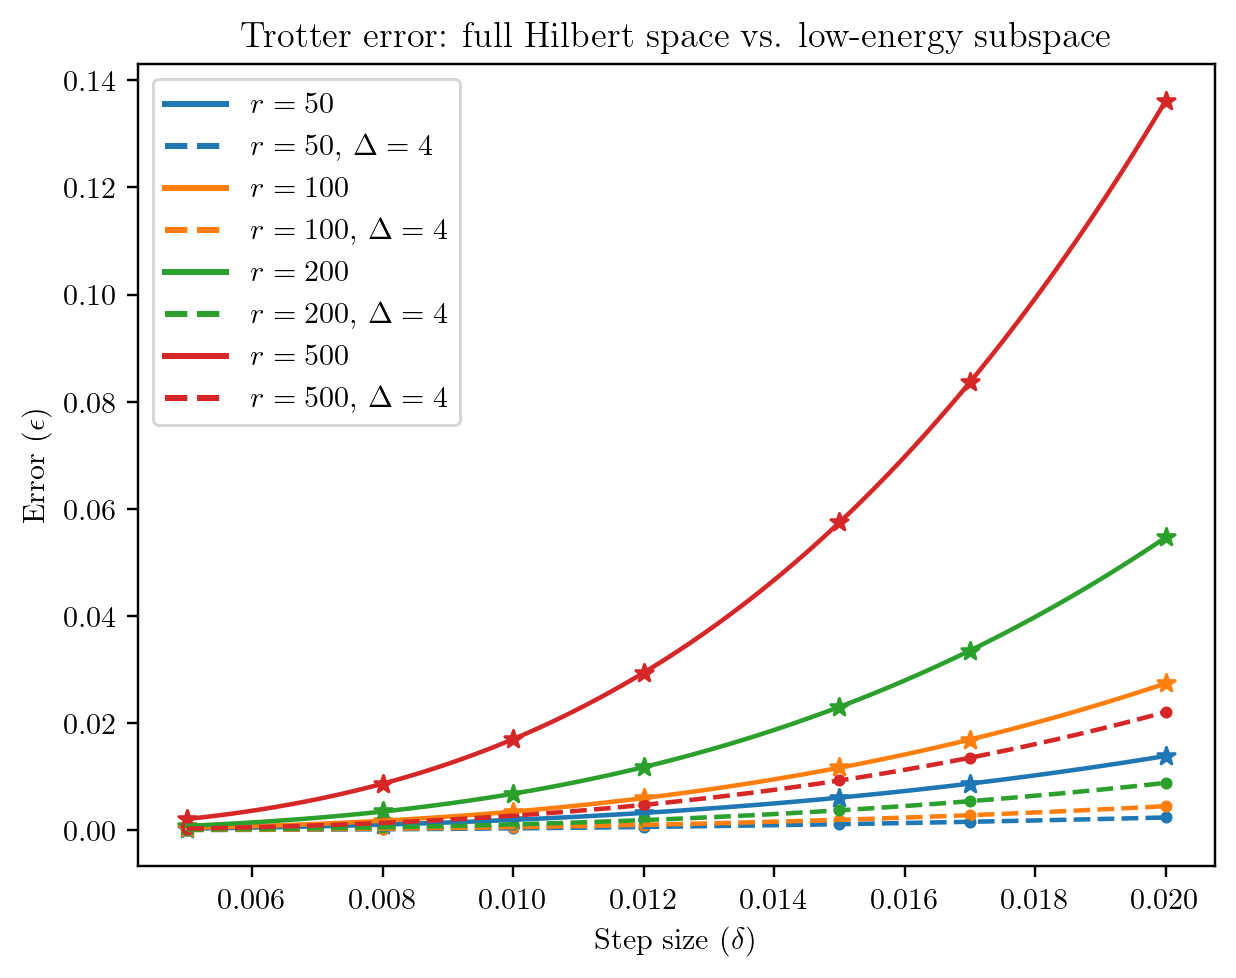

In [8]:
Delta = 4

r_50 = loadmat('../Trotter/norm_2x6_4.mat')['r_50'].flatten()
r_50_Delta = loadmat('../Trotter/norm_2x6_4.mat')['r_50_Delta'].flatten()
r_100 = loadmat('../Trotter/norm_2x6_4.mat')['r_100'].flatten()
r_100_Delta = loadmat('../Trotter/norm_2x6_4.mat')['r_100_Delta'].flatten()
r_200 = loadmat('../Trotter/norm_2x6_4.mat')['r_200'].flatten()
r_200_Delta = loadmat('../Trotter/norm_2x6_4.mat')['r_200_Delta'].flatten()
r_500 = loadmat('../Trotter/norm_2x6_4.mat')['r_500'].flatten()
r_500_Delta = loadmat('../Trotter/norm_2x6_4.mat')['r_500_Delta'].flatten()

dt = np.array([0.005, 0.008, 0.010, 0.012, 0.015, 0.017, 0.020])
dt_new = np.linspace(min(dt), max(dt), 100)

# 多项式拟合
coefficients_r_50 = np.polyfit(dt, r_50, 3) 
poly_r_50 = np.poly1d(coefficients_r_50)
coefficients_r_50_Delta = np.polyfit(dt, r_50_Delta, 3) 
poly_r_50_Delta_5 = np.poly1d(coefficients_r_50_Delta)

coefficients_r_100 = np.polyfit(dt, r_100, 3)  
poly_r_100 = np.poly1d(coefficients_r_100)
coefficients_r_100_Delta = np.polyfit(dt, r_100_Delta, 3)  
poly_r_100_Delta = np.poly1d(coefficients_r_100_Delta)

coefficients_r_200 = np.polyfit(dt, r_200, 3) 
poly_r_200 = np.poly1d(coefficients_r_200)
coefficients_r_200_Delta = np.polyfit(dt, r_200_Delta, 3) 
poly_r_200_Delta = np.poly1d(coefficients_r_200_Delta)

coefficients_r_500 = np.polyfit(dt, r_500, 3) 
poly_r_500 = np.poly1d(coefficients_r_500)
coefficients_r_500_Delta = np.polyfit(dt, r_500_Delta, 3)  
poly_r_500_Delta = np.poly1d(coefficients_r_500_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('Trotter error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(dt, r_50, marker = '*', color = '#1f77b4')
ax.plot(dt_new, poly_r_50(dt_new), color = '#1f77b4', linestyle = '-', label='$r=50$')

ax.scatter(dt, r_50_Delta, marker ='.', color = '#1f77b4')
ax.plot(dt_new, poly_r_50_Delta_5(dt_new), color = '#1f77b4', linestyle = '--', label='$r=50$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_100, marker = '*', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100(dt_new), color = '#ff7f0e', linestyle = '-', label='$r=100$')

ax.scatter(dt, r_100_Delta, marker ='.', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100_Delta(dt_new), color = '#ff7f0e', linestyle = '--', label='$r=100$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_200, marker = '*', color = '#2ca02c')
ax.plot(dt_new, poly_r_200(dt_new), color = '#2ca02c', linestyle = '-', label='$r=200$')

ax.scatter(dt, r_200_Delta, marker ='.', color = '#2ca02c')
ax.plot(dt_new, poly_r_200_Delta(dt_new), color = '#2ca02c', linestyle = '--', label='$r=200$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_500, marker = '*', color = '#d62728')
ax.plot(dt_new, poly_r_500(dt_new), color = '#d62728', linestyle = '-', label='$r=500$')

ax.scatter(dt, r_500_Delta, marker ='.', color = '#d62728')
ax.plot(dt_new, poly_r_500_Delta(dt_new), color = '#d62728', linestyle = '--', label='$r=500$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

fig.savefig('Trotter-2x6.pdf', dpi=600, format='pdf')

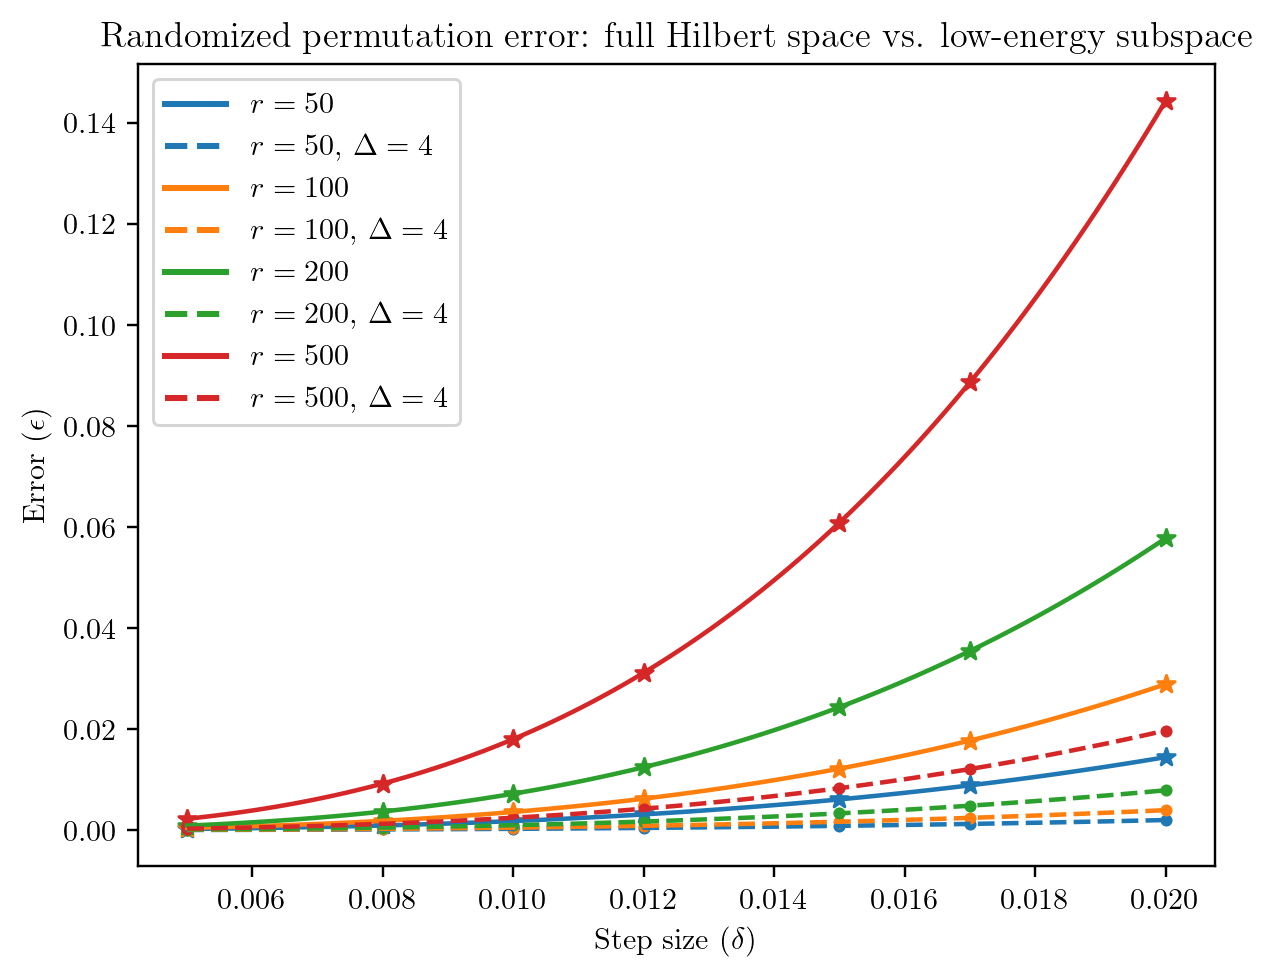

In [66]:
Delta = 4

r_50 = loadmat('../Permutation/norm_2*6_4.mat')['r_50'].flatten()
r_50_Delta = loadmat('../Permutation/norm_2*6_4.mat')['r_50_Delta'].flatten()
r_100 = loadmat('../Permutation/norm_2*6_4.mat')['r_100'].flatten()
r_100_Delta = loadmat('../Permutation/norm_2*6_4.mat')['r_100_Delta'].flatten()
r_200 = loadmat('../Permutation/norm_2*6_4.mat')['r_200'].flatten()
r_200_Delta = loadmat('../Permutation/norm_2*6_4.mat')['r_200_Delta'].flatten()
r_500 = loadmat('../Permutation/norm_2*6_4.mat')['r_500'].flatten()
r_500_Delta = loadmat('../Permutation/norm_2*6_4.mat')['r_500_Delta'].flatten()

dt = np.array([0.005, 0.008, 0.010, 0.012, 0.015, 0.017, 0.020])
dt_new = np.linspace(min(dt), max(dt), 100)

# 多项式拟合
coefficients_r_50 = np.polyfit(dt, r_50, 3) 
poly_r_50 = np.poly1d(coefficients_r_50)
coefficients_r_50_Delta = np.polyfit(dt, r_50_Delta, 3) 
poly_r_50_Delta_5 = np.poly1d(coefficients_r_50_Delta)

coefficients_r_100 = np.polyfit(dt, r_100, 3)  
poly_r_100 = np.poly1d(coefficients_r_100)
coefficients_r_100_Delta = np.polyfit(dt, r_100_Delta, 3)  
poly_r_100_Delta = np.poly1d(coefficients_r_100_Delta)

coefficients_r_200 = np.polyfit(dt, r_200, 3) 
poly_r_200 = np.poly1d(coefficients_r_200)
coefficients_r_200_Delta = np.polyfit(dt, r_200_Delta, 3) 
poly_r_200_Delta = np.poly1d(coefficients_r_200_Delta)

coefficients_r_500 = np.polyfit(dt, r_500, 3) 
poly_r_500 = np.poly1d(coefficients_r_500)
coefficients_r_500_Delta = np.polyfit(dt, r_500_Delta, 3)  
poly_r_500_Delta = np.poly1d(coefficients_r_500_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('Randomized permutation error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(dt, r_50, marker = '*', color = '#1f77b4')
ax.plot(dt_new, poly_r_50(dt_new), color = '#1f77b4', linestyle = '-', label='$r=50$')

ax.scatter(dt, r_50_Delta, marker ='.', color = '#1f77b4')
ax.plot(dt_new, poly_r_50_Delta_5(dt_new), color = '#1f77b4', linestyle = '--', label='$r=50$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_100, marker = '*', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100(dt_new), color = '#ff7f0e', linestyle = '-', label='$r=100$')

ax.scatter(dt, r_100_Delta, marker ='.', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100_Delta(dt_new), color = '#ff7f0e', linestyle = '--', label='$r=100$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_200, marker = '*', color = '#2ca02c')
ax.plot(dt_new, poly_r_200(dt_new), color = '#2ca02c', linestyle = '-', label='$r=200$')

ax.scatter(dt, r_200_Delta, marker ='.', color = '#2ca02c')
ax.plot(dt_new, poly_r_200_Delta(dt_new), color = '#2ca02c', linestyle = '--', label='$r=200$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_500, marker = '*', color = '#d62728')
ax.plot(dt_new, poly_r_500(dt_new), color = '#d62728', linestyle = '-', label='$r=500$')

ax.scatter(dt, r_500_Delta, marker ='.', color = '#d62728')
ax.plot(dt_new, poly_r_500_Delta(dt_new), color = '#d62728', linestyle = '--', label='$r=500$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

fig.savefig('Permutation-2x6.pdf', dpi=600, format='pdf')

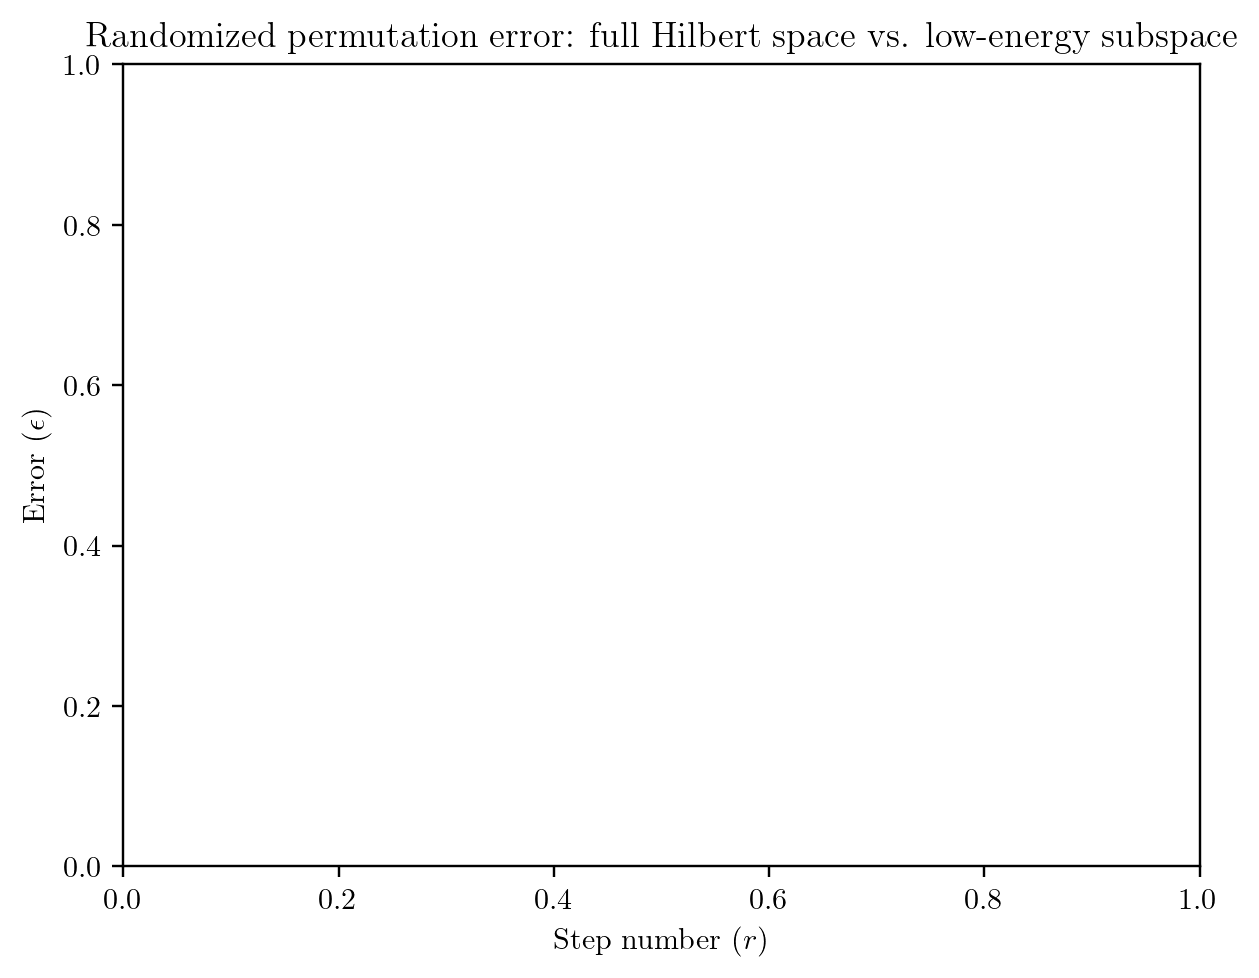

In [67]:
fig, ax = plt.subplots(dpi=217)
ax.set_title('Randomized permutation error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step number ($r$)')
ax.set_ylabel('Error ($\epsilon$)')

fig.savefig('Permutation.pdf', dpi=600, format='pdf')

-0.5368435137083385
-0.4456251499218551
-0.43274875539847907
-0.4750917425489703
-0.4496916794412488
-0.4039106641094991
-0.3308685248662012
-0.411826053780339


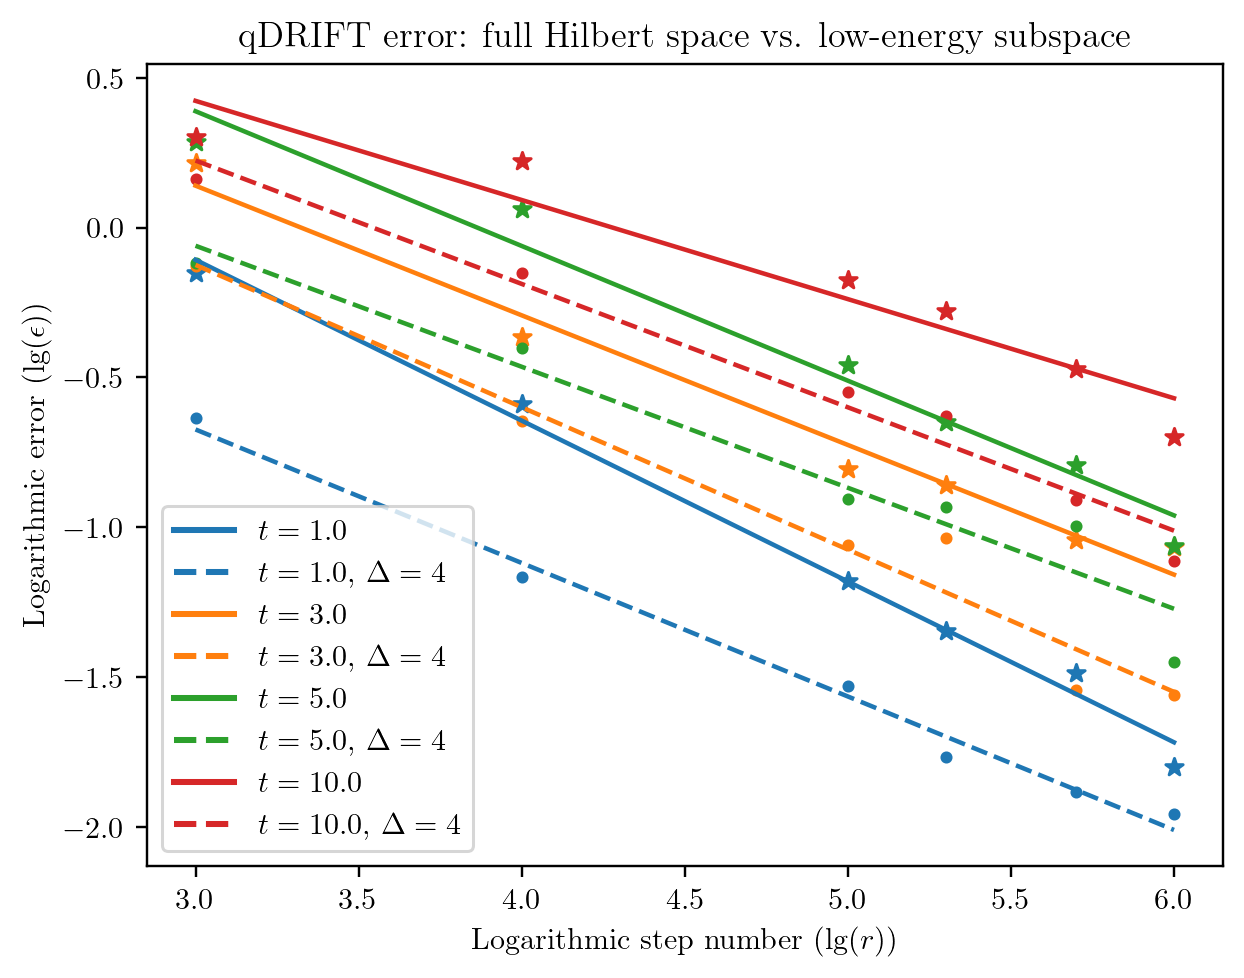

In [68]:
# qDRIFT error on 2x4 Heisenberg model
Delta = 4

t_1 = np.log(np.array(loadmat('../qDRIFT/norm_2*4_4.mat')['t_1'].flatten()))/np.log(10)
t_1_Delta = np.log(np.array(loadmat('../qDRIFT/norm_2*4_4.mat')['t_1_Delta'].flatten()))/np.log(10)
t_3 = np.log(np.array(loadmat('../qDRIFT/norm_2*4_4.mat')['t_3'].flatten()))/np.log(10)
t_3_Delta = np.log(np.array(loadmat('../qDRIFT/norm_2*4_4.mat')['t_3_Delta'].flatten()))/np.log(10)
t_5 = np.log(np.array(loadmat('../qDRIFT/norm_2*4_4.mat')['t_5'].flatten()))/np.log(10)
t_5_Delta = np.log(np.array(loadmat('../qDRIFT/norm_2*4_4.mat')['t_5_Delta'].flatten()))/np.log(10)
t_10 = np.log(np.array(loadmat('../qDRIFT/norm_2*4_4.mat')['t_10'].flatten()))/np.log(10)
t_10_Delta = np.log(np.array(loadmat('../qDRIFT/norm_2*4_4.mat')['t_10_Delta'].flatten()))/np.log(10)

step_number = np.log(np.array([1000, 10000, 100000, 200000, 500000, 1000000]))/np.log(10)
step_number_new = np.linspace(min(step_number), max(step_number), 100)

# 多项式拟合
coefficients_t_1 = np.polyfit(step_number, t_1, 1) 
poly_t_1 = np.poly1d(coefficients_t_1)
coefficients_t_1_Delta = np.polyfit(step_number, t_1_Delta, 1) 
poly_t_1_Delta = np.poly1d(coefficients_t_1_Delta)

coefficients_t_3 = np.polyfit(step_number, t_3, 1)  
poly_t_3 = np.poly1d(coefficients_t_3)
coefficients_t_3_Delta = np.polyfit(step_number, t_3_Delta, 1)  
poly_t_3_Delta = np.poly1d(coefficients_t_3_Delta)

coefficients_t_5 = np.polyfit(step_number, t_5, 1) 
poly_t_5 = np.poly1d(coefficients_t_5)
coefficients_t_5_Delta = np.polyfit(step_number, t_5_Delta, 1) 
poly_t_5_Delta = np.poly1d(coefficients_t_5_Delta)

coefficients_t_10 = np.polyfit(step_number, t_10, 1) 
poly_t_10 = np.poly1d(coefficients_t_10)
coefficients_t_10_Delta = np.polyfit(step_number, t_10_Delta, 1)  
poly_t_10_Delta = np.poly1d(coefficients_t_10_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('qDRIFT error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Logarithmic step number ($\lg(r)$)')
ax.set_ylabel('Logarithmic error ($\lg(\epsilon)$)')

ax.scatter(step_number, t_1, marker = '*', color = '#1f77b4')
ax.plot(step_number_new, poly_t_1(step_number_new), color = '#1f77b4', linestyle = '-', label='$t=1.0$')

ax.scatter(step_number, t_1_Delta, marker ='.', color = '#1f77b4')
ax.plot(step_number_new, poly_t_1_Delta(step_number_new), color = '#1f77b4', linestyle = '--', label='$t=1.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_3, marker = '*', color = '#ff7f0e')
ax.plot(step_number_new, poly_t_3(step_number_new), color = '#ff7f0e', linestyle = '-', label='$t=3.0$')

ax.scatter(step_number, t_3_Delta, marker ='.', color = '#ff7f0e')
ax.plot(step_number_new, poly_t_3_Delta(step_number_new), color = '#ff7f0e', linestyle = '--', label='$t=3.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_5, marker = '*', color = '#2ca02c')
ax.plot(step_number_new, poly_t_5(step_number_new), color = '#2ca02c', linestyle = '-', label='$t=5.0$')

ax.scatter(step_number, t_5_Delta, marker ='.', color = '#2ca02c')
ax.plot(step_number_new, poly_t_5_Delta(step_number_new), color = '#2ca02c', linestyle = '--', label='$t=5.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_10, marker = '*', color = '#d62728')
ax.plot(step_number_new, poly_t_10(step_number_new), color = '#d62728', linestyle = '-', label='$t=10.0$')

ax.scatter(step_number, t_10_Delta, marker ='.', color = '#d62728')
ax.plot(step_number_new, poly_t_10_Delta(step_number_new), color = '#d62728', linestyle = '--', label='$t=10.0$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

print(poly_t_1[1])
print(poly_t_1_Delta[1])
print(poly_t_3[1])
print(poly_t_3_Delta[1])
print(poly_t_5[1])
print(poly_t_5_Delta[1])
print(poly_t_10[1])
print(poly_t_10_Delta[1])

fig.savefig('qDRIFT-2x4.pdf', dpi=600, format='pdf')


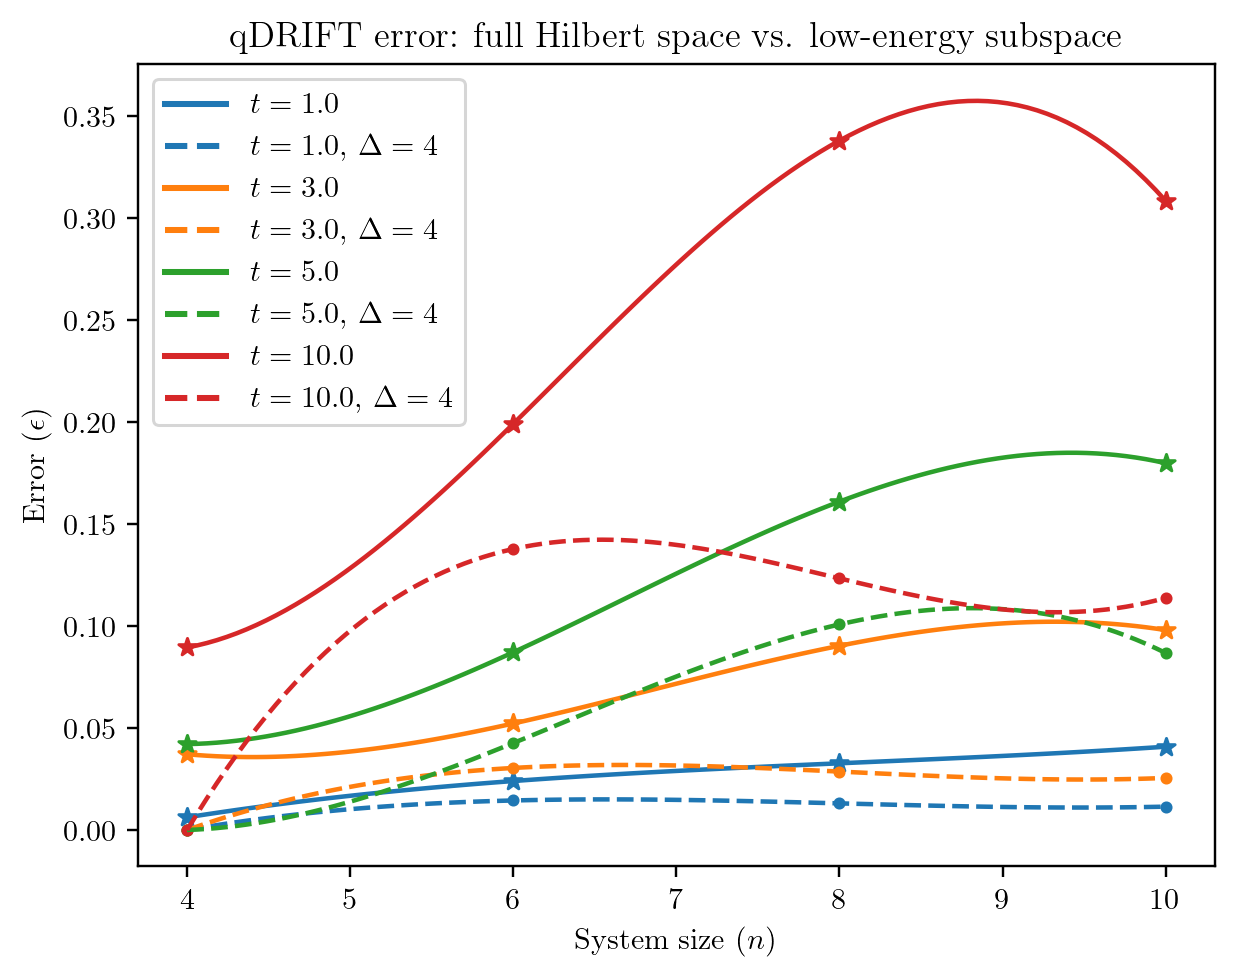

In [64]:
Delta = 4
r = 4 # 500000

t_1 = np.array([(loadmat('../qDRIFT/norm_2*2_4.mat')['t_1'].flatten())[r], (loadmat('../qDRIFT/norm_2*3_4.mat')['t_1'].flatten())[r], (loadmat('../qDRIFT/norm_2*4_4.mat')['t_1'].flatten())[r], (loadmat('../qDRIFT/norm_2*5_4.mat')['t_1'].flatten())[r]])
t_1_Delta = np.array([(loadmat('../qDRIFT/norm_2*2_4.mat')['t_1_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*3_4.mat')['t_1_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*4_4.mat')['t_1_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*5_4.mat')['t_1_Delta'].flatten())[r]])
t_3 = np.array([(loadmat('../qDRIFT/norm_2*2_4.mat')['t_3'].flatten())[r], (loadmat('../qDRIFT/norm_2*3_4.mat')['t_3'].flatten())[r], (loadmat('../qDRIFT/norm_2*4_4.mat')['t_3'].flatten())[r], (loadmat('../qDRIFT/norm_2*5_4.mat')['t_3'].flatten())[r]])
t_3_Delta = np.array([(loadmat('../qDRIFT/norm_2*2_4.mat')['t_3_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*3_4.mat')['t_3_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*4_4.mat')['t_3_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*5_4.mat')['t_3_Delta'].flatten())[r]])
t_5 = np.array([(loadmat('../qDRIFT/norm_2*2_4.mat')['t_5'].flatten())[r], (loadmat('../qDRIFT/norm_2*3_4.mat')['t_5'].flatten())[r], (loadmat('../qDRIFT/norm_2*4_4.mat')['t_5'].flatten())[r], (loadmat('../qDRIFT/norm_2*5_4.mat')['t_5'].flatten())[r]])
t_5_Delta = np.array([(loadmat('../qDRIFT/norm_2*2_4.mat')['t_5_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*3_4.mat')['t_5_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*4_4.mat')['t_5_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*5_4.mat')['t_5_Delta'].flatten())[r]])
t_10 = np.array([(loadmat('../qDRIFT/norm_2*2_4.mat')['t_10'].flatten())[r], (loadmat('../qDRIFT/norm_2*3_4.mat')['t_10'].flatten())[r], (loadmat('../qDRIFT/norm_2*4_4.mat')['t_10'].flatten())[r], (loadmat('../qDRIFT/norm_2*5_4.mat')['t_10'].flatten())[r]])
t_10_Delta = np.array([(loadmat('../qDRIFT/norm_2*2_4.mat')['t_10_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*3_4.mat')['t_10_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*4_4.mat')['t_10_Delta'].flatten())[r], (loadmat('../qDRIFT/norm_2*5_4.mat')['t_10_Delta'].flatten())[r]])

step_number = np.array([4, 6, 8, 10])
step_number_new = np.linspace(min(step_number), max(step_number), 100)

k = 3 # 多项式拟合
coefficients_t_1 = np.polyfit(step_number, t_1, k) 
poly_t_1 = np.poly1d(coefficients_t_1)
coefficients_t_1_Delta = np.polyfit(step_number, t_1_Delta, k) 
poly_t_1_Delta = np.poly1d(coefficients_t_1_Delta)

coefficients_t_3 = np.polyfit(step_number, t_3, k)  
poly_t_3 = np.poly1d(coefficients_t_3)
coefficients_t_3_Delta = np.polyfit(step_number, t_3_Delta, k)  
poly_t_3_Delta = np.poly1d(coefficients_t_3_Delta)

coefficients_t_5 = np.polyfit(step_number, t_5, k) 
poly_t_5 = np.poly1d(coefficients_t_5)
coefficients_t_5_Delta = np.polyfit(step_number, t_5_Delta, k) 
poly_t_5_Delta = np.poly1d(coefficients_t_5_Delta)

coefficients_t_10 = np.polyfit(step_number, t_10, k) 
poly_t_10 = np.poly1d(coefficients_t_10)
coefficients_t_10_Delta = np.polyfit(step_number, t_10_Delta, k)  
poly_t_10_Delta = np.poly1d(coefficients_t_10_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('qDRIFT error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('System size ($n$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(step_number, t_1, marker = '*', color = '#1f77b4')
ax.plot(step_number_new, poly_t_1(step_number_new), color = '#1f77b4', linestyle = '-', label='$t=1.0$')

ax.scatter(step_number, t_1_Delta, marker ='.', color = '#1f77b4')
ax.plot(step_number_new, poly_t_1_Delta(step_number_new), color = '#1f77b4', linestyle = '--', label='$t=1.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_3, marker = '*', color = '#ff7f0e')
ax.plot(step_number_new, poly_t_3(step_number_new), color = '#ff7f0e', linestyle = '-', label='$t=3.0$')

ax.scatter(step_number, t_3_Delta, marker ='.', color = '#ff7f0e')
ax.plot(step_number_new, poly_t_3_Delta(step_number_new), color = '#ff7f0e', linestyle = '--', label='$t=3.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_5, marker = '*', color = '#2ca02c')
ax.plot(step_number_new, poly_t_5(step_number_new), color = '#2ca02c', linestyle = '-', label='$t=5.0$')

ax.scatter(step_number, t_5_Delta, marker ='.', color = '#2ca02c')
ax.plot(step_number_new, poly_t_5_Delta(step_number_new), color = '#2ca02c', linestyle = '--', label='$t=5.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_10, marker = '*', color = '#d62728')
ax.plot(step_number_new, poly_t_10(step_number_new), color = '#d62728', linestyle = '-', label='$t=10.0$')

ax.scatter(step_number, t_10_Delta, marker ='.', color = '#d62728')
ax.plot(step_number_new, poly_t_10_Delta(step_number_new), color = '#d62728', linestyle = '--', label='$t=10.0$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

fig.savefig('qDRIFT-n.pdf', dpi=600, format='pdf')

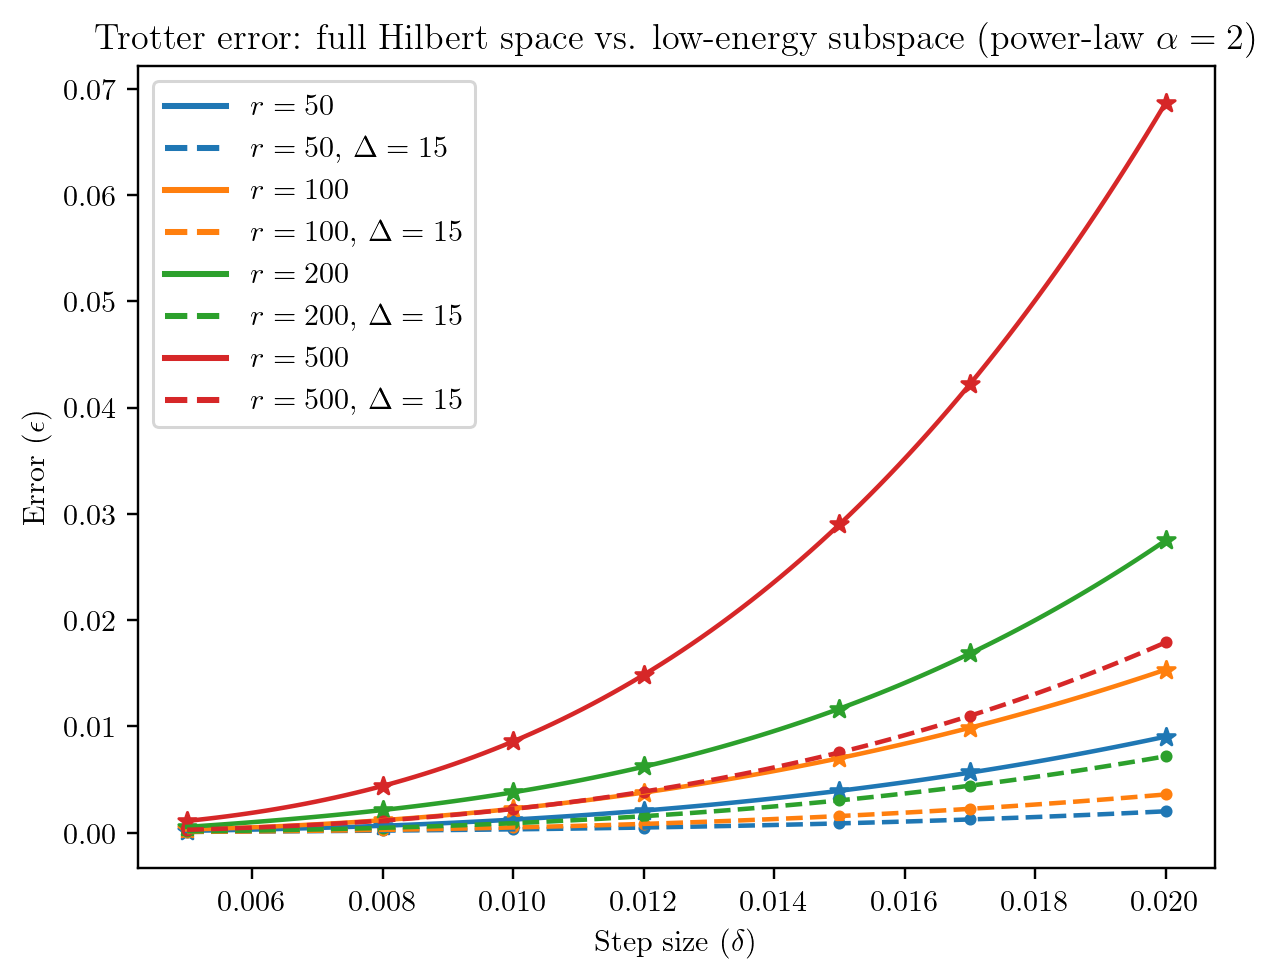

In [9]:
# Trotter Error on power law model with alpha = 2
Delta = 15
File = '../Trotter/norm_3x3_2_15.mat'

r_50 = loadmat(File)['r_50'].flatten()
r_50_Delta = loadmat(File)['r_50_Delta'].flatten()
r_100 = loadmat(File)['r_100'].flatten()
r_100_Delta = loadmat(File)['r_100_Delta'].flatten()
r_200 = loadmat(File)['r_200'].flatten()
r_200_Delta = loadmat(File)['r_200_Delta'].flatten()
r_500 = loadmat(File)['r_500'].flatten()
r_500_Delta = loadmat(File)['r_500_Delta'].flatten()

dt = np.array([0.005, 0.008, 0.010, 0.012, 0.015, 0.017, 0.020])
dt_new = np.linspace(min(dt), max(dt), 100)

# 多项式拟合
coefficients_r_50 = np.polyfit(dt, r_50, 3) 
poly_r_50 = np.poly1d(coefficients_r_50)
coefficients_r_50_Delta = np.polyfit(dt, r_50_Delta, 3) 
poly_r_50_Delta_5 = np.poly1d(coefficients_r_50_Delta)

coefficients_r_100 = np.polyfit(dt, r_100, 3)  
poly_r_100 = np.poly1d(coefficients_r_100)
coefficients_r_100_Delta = np.polyfit(dt, r_100_Delta, 3)  
poly_r_100_Delta = np.poly1d(coefficients_r_100_Delta)

coefficients_r_200 = np.polyfit(dt, r_200, 3) 
poly_r_200 = np.poly1d(coefficients_r_200)
coefficients_r_200_Delta = np.polyfit(dt, r_200_Delta, 3) 
poly_r_200_Delta = np.poly1d(coefficients_r_200_Delta)

coefficients_r_500 = np.polyfit(dt, r_500, 3) 
poly_r_500 = np.poly1d(coefficients_r_500)
coefficients_r_500_Delta = np.polyfit(dt, r_500_Delta, 3)  
poly_r_500_Delta = np.poly1d(coefficients_r_500_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('Trotter error: full Hilbert space vs. low-energy subspace (power-law $\\alpha=2$)')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(dt, r_50, marker = '*', color = '#1f77b4')
ax.plot(dt_new, poly_r_50(dt_new), color = '#1f77b4', linestyle = '-', label='$r=50$')

ax.scatter(dt, r_50_Delta, marker ='.', color = '#1f77b4')
ax.plot(dt_new, poly_r_50_Delta_5(dt_new), color = '#1f77b4', linestyle = '--', label='$r=50$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_100, marker = '*', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100(dt_new), color = '#ff7f0e', linestyle = '-', label='$r=100$')

ax.scatter(dt, r_100_Delta, marker ='.', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100_Delta(dt_new), color = '#ff7f0e', linestyle = '--', label='$r=100$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_200, marker = '*', color = '#2ca02c')
ax.plot(dt_new, poly_r_200(dt_new), color = '#2ca02c', linestyle = '-', label='$r=200$')

ax.scatter(dt, r_200_Delta, marker ='.', color = '#2ca02c')
ax.plot(dt_new, poly_r_200_Delta(dt_new), color = '#2ca02c', linestyle = '--', label='$r=200$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_500, marker = '*', color = '#d62728')
ax.plot(dt_new, poly_r_500(dt_new), color = '#d62728', linestyle = '-', label='$r=500$')

ax.scatter(dt, r_500_Delta, marker ='.', color = '#d62728')
ax.plot(dt_new, poly_r_500_Delta(dt_new), color = '#d62728', linestyle = '--', label='$r=500$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

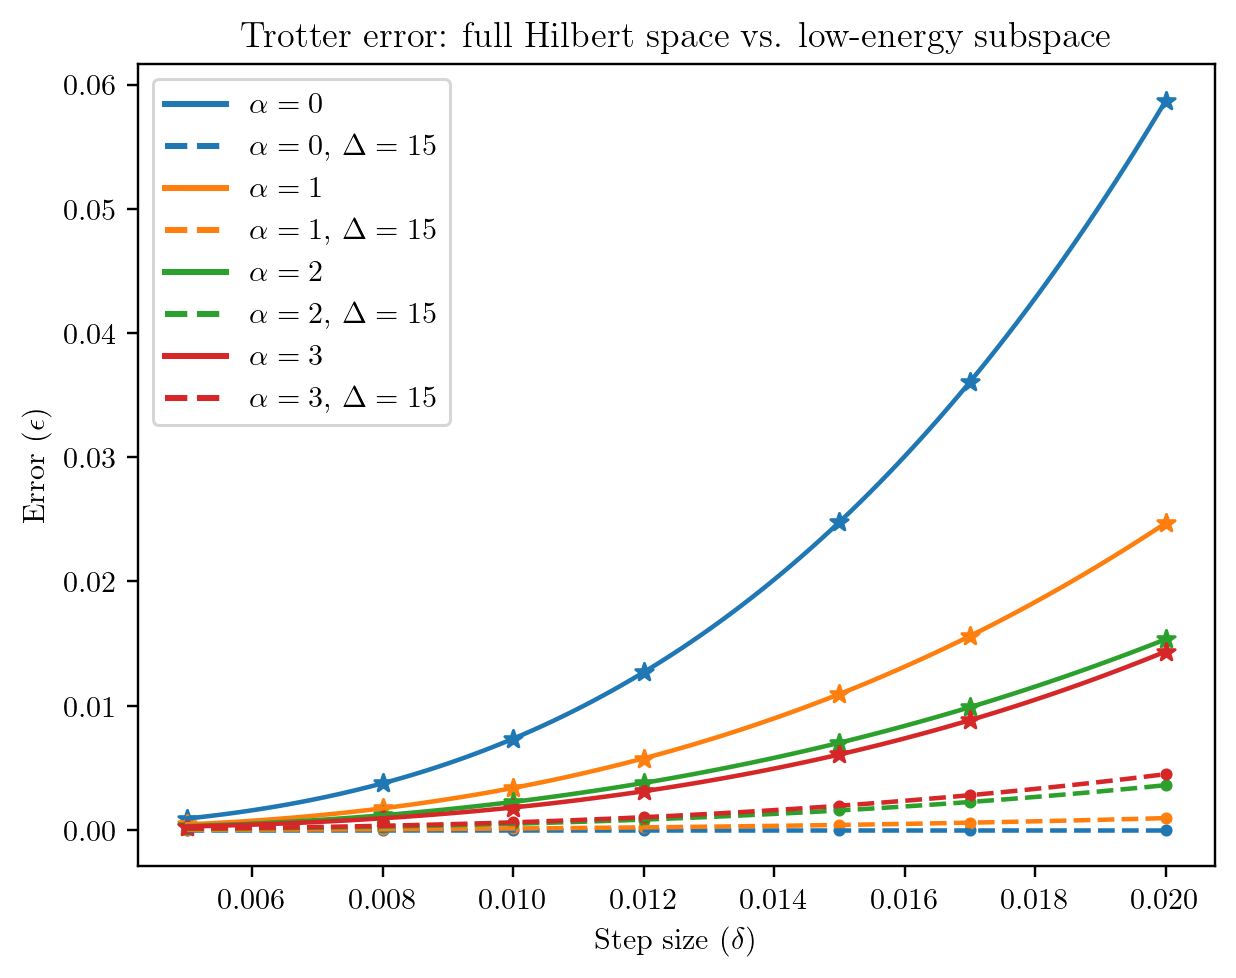

In [12]:
# qDRIFT on Power-Law with different \alpha, fix r = 100
Delta = 15

File = '../Trotter/norm_3x3_0_15.mat'
alpha_0 = loadmat(File)['r_100'].flatten()
alpha_0_Delta = loadmat(File)['r_100_Delta'].flatten()

File = '../Trotter/norm_3x3_1_15.mat'
alpha_1 = loadmat(File)['r_100'].flatten()
alpha_1_Delta = loadmat(File)['r_100_Delta'].flatten()

File = '../Trotter/norm_3x3_2_15.mat'
alpha_2 = loadmat(File)['r_100'].flatten()
alpha_2_Delta = loadmat(File)['r_100_Delta'].flatten()

File = '../Trotter/norm_3x3_3_15.mat'
alpha_3 = loadmat(File)['r_100'].flatten()
alpha_3_Delta = loadmat(File)['r_100_Delta'].flatten()

dt = np.array([0.005, 0.008, 0.010, 0.012, 0.015, 0.017, 0.020])
dt_new = np.linspace(min(dt), max(dt), 100)

# 多项式拟合
coefficients_alpha_0 = np.polyfit(dt, alpha_0, 3) 
poly_alpha_0 = np.poly1d(coefficients_alpha_0)
coefficients_alpha_0_Delta = np.polyfit(dt, alpha_0_Delta, 3) 
poly_alpha_0_Delta = np.poly1d(coefficients_alpha_0_Delta)

coefficients_alpha_1 = np.polyfit(dt, alpha_1, 3) 
poly_alpha_1 = np.poly1d(coefficients_alpha_1)
coefficients_alpha_1_Delta = np.polyfit(dt, alpha_1_Delta, 3) 
poly_alpha_1_Delta = np.poly1d(coefficients_alpha_1_Delta)

coefficients_alpha_2 = np.polyfit(dt, alpha_2, 3) 
poly_alpha_2 = np.poly1d(coefficients_alpha_2)
coefficients_alpha_2_Delta = np.polyfit(dt, alpha_2_Delta, 3) 
poly_alpha_2_Delta = np.poly1d(coefficients_alpha_2_Delta)

coefficients_alpha_3 = np.polyfit(dt, alpha_3, 3) 
poly_alpha_3 = np.poly1d(coefficients_alpha_3)
coefficients_alpha_3_Delta = np.polyfit(dt, alpha_3_Delta, 3) 
poly_alpha_3_Delta = np.poly1d(coefficients_alpha_3_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('Trotter error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(dt, alpha_0, marker = '*', color = '#1f77b4')
ax.plot(dt_new, poly_alpha_0(dt_new), color = '#1f77b4', linestyle = '-', label='$\\alpha=0$')

ax.scatter(dt, alpha_0_Delta, marker ='.', color = '#1f77b4')
ax.plot(dt_new, poly_alpha_0_Delta(dt_new), color = '#1f77b4', linestyle = '--', label='$\\alpha=0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, alpha_1, marker = '*', color = '#ff7f0e')
ax.plot(dt_new, poly_alpha_1(dt_new), color = '#ff7f0e', linestyle = '-', label='$\\alpha=1$')

ax.scatter(dt, alpha_1_Delta, marker ='.', color = '#ff7f0e')
ax.plot(dt_new, poly_alpha_1_Delta(dt_new), color = '#ff7f0e', linestyle = '--', label='$\\alpha=1$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, alpha_2, marker = '*', color = '#2ca02c')
ax.plot(dt_new, poly_alpha_2(dt_new), color = '#2ca02c', linestyle = '-', label='$\\alpha=2$')

ax.scatter(dt, alpha_2_Delta, marker ='.', color = '#2ca02c')
ax.plot(dt_new, poly_alpha_2_Delta(dt_new), color = '#2ca02c', linestyle = '--', label='$\\alpha=2$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, alpha_3, marker = '*', color = '#d62728')
ax.plot(dt_new, poly_alpha_3(dt_new), color = '#d62728', linestyle = '-', label='$\\alpha=3$')

ax.scatter(dt, alpha_3_Delta, marker ='.', color = '#d62728')
ax.plot(dt_new, poly_alpha_3_Delta(dt_new), color = '#d62728', linestyle = '--', label='$\\alpha=3$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

fig.savefig('Power-Law.pdf', dpi=600, format='pdf')

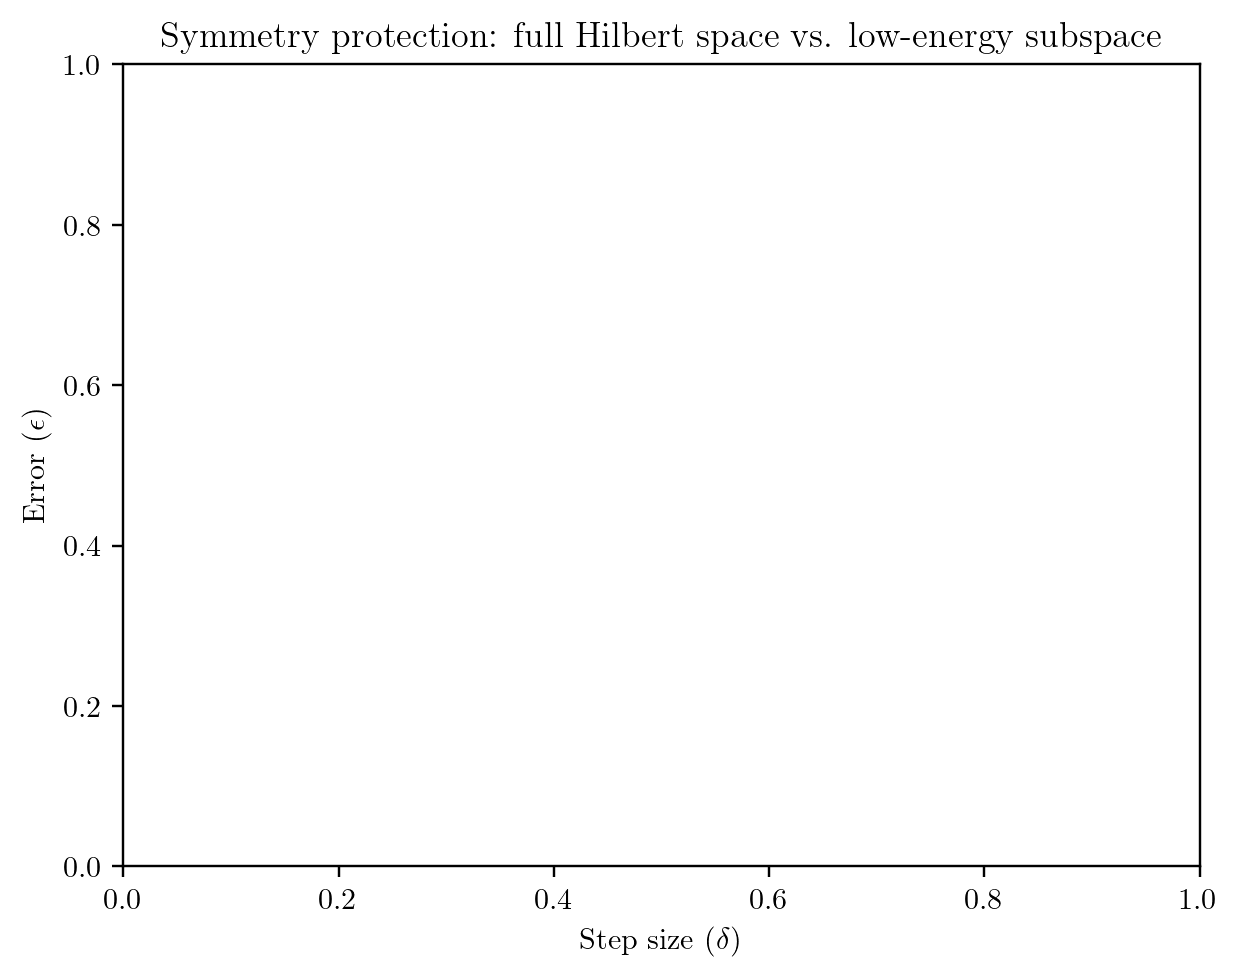

In [61]:
fig, ax = plt.subplots(dpi=217)
ax.set_title('Symmetry protection: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

fig.savefig('Symmetry-Protection.pdf', dpi=600, format='pdf')